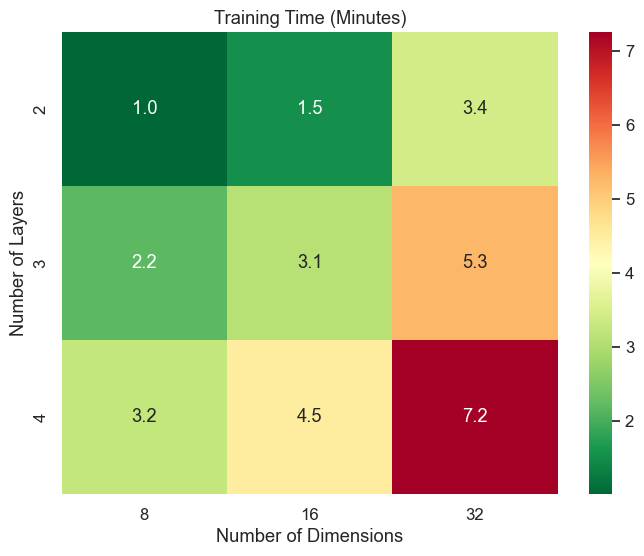

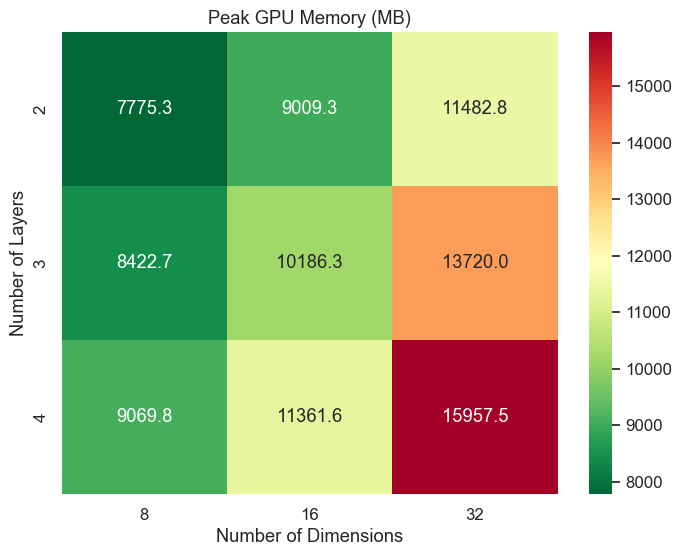

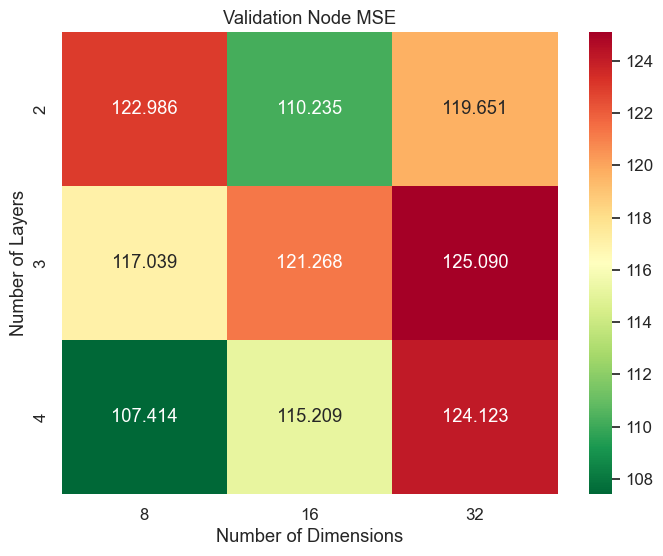

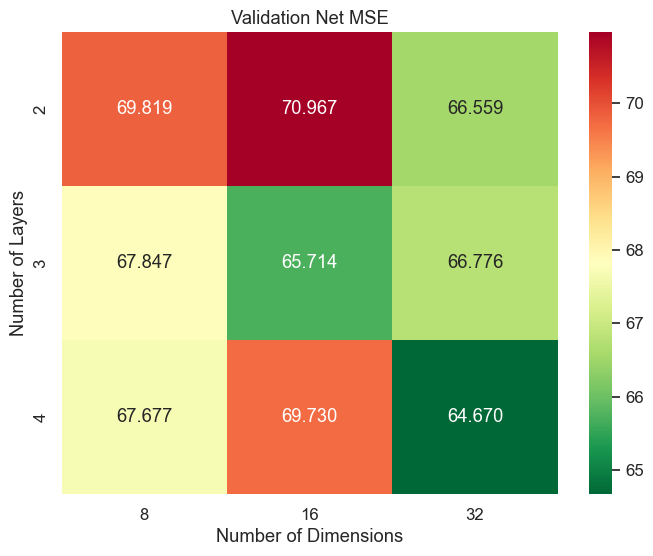

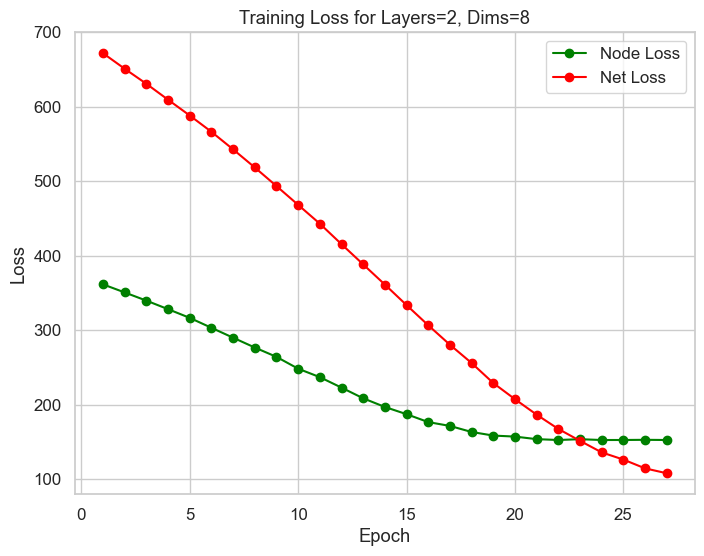

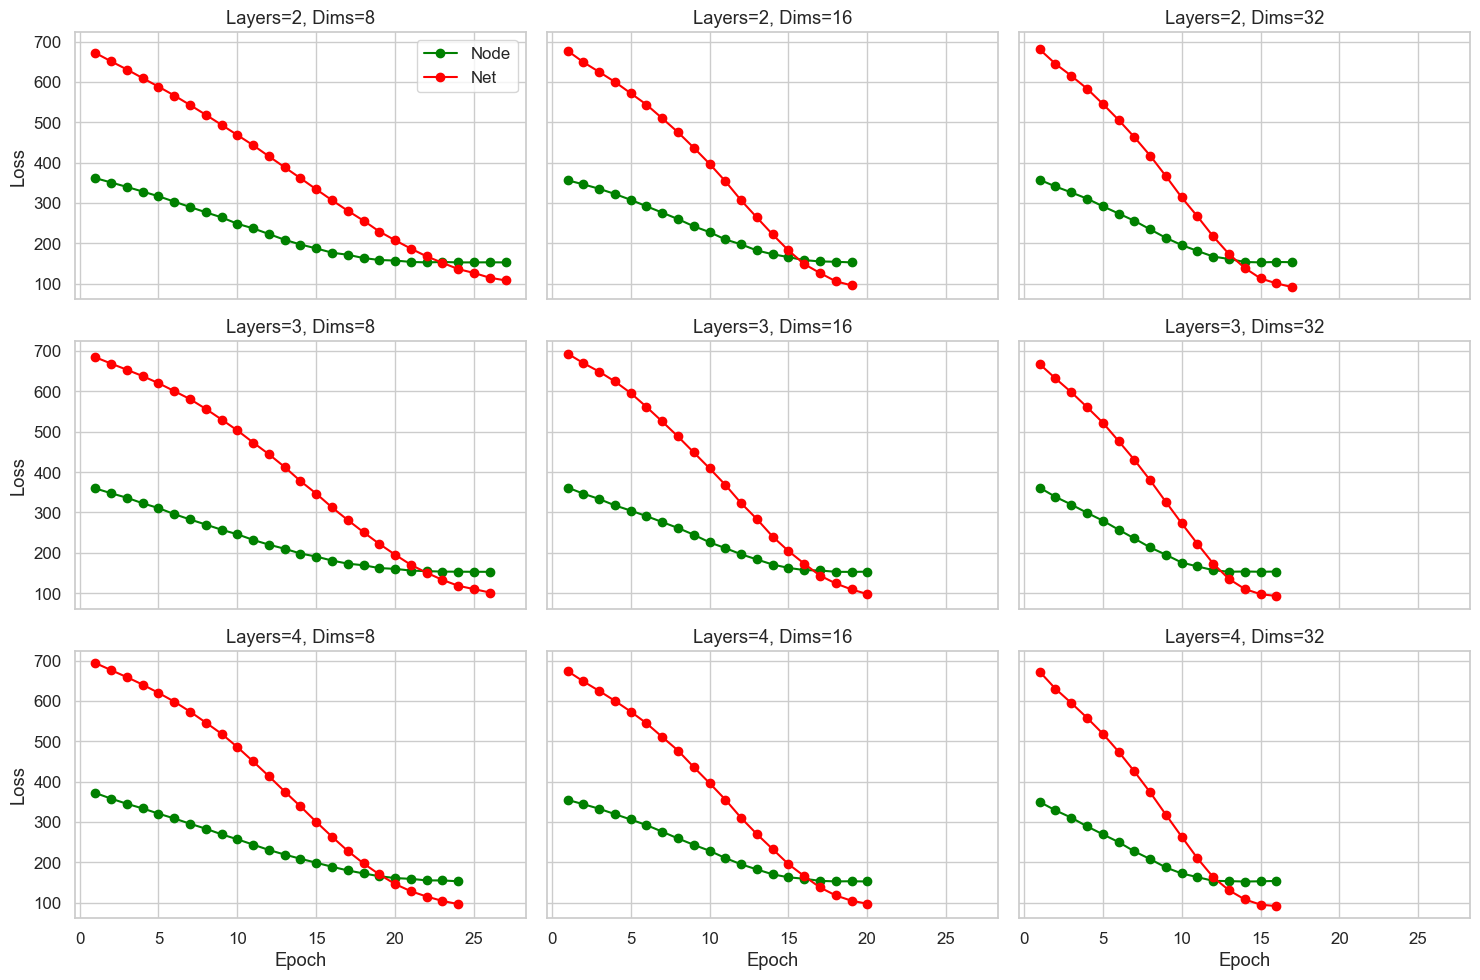

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for nicer plots
sns.set(style="whitegrid", font_scale=1.1)

# Paths to CSV files (adjust if needed)
grid_search_csv = "../profiling_results/grid-search/grid_search_results.csv"
train_loss_csv = "../profiling_results/grid-search/training_loss_log.csv"

# Read grid search results CSV
grid_df = pd.read_csv(grid_search_csv)
grid_df["num_layer"] = grid_df["num_layer"].astype(int)
grid_df["num_dim"] = grid_df["num_dim"].astype(int)

# Convert train_time_sec to minutes
grid_df["train_time_min"] = grid_df["train_time_sec"] / 60

# Create pivot tables for heatmaps using keyword arguments
pivot_train_time = grid_df.pivot(index="num_layer", columns="num_dim", values="train_time_min")
pivot_gpu_peak   = grid_df.pivot(index="num_layer", columns="num_dim", values="gpu_peak_mb")
pivot_val_node   = grid_df.pivot(index="num_layer", columns="num_dim", values="val_node_mse")
pivot_val_net    = grid_df.pivot(index="num_layer", columns="num_dim", values="val_net_mse")

# Use the reversed RdYlGn colormap: green for low values, red for high
cmap = "RdYlGn_r"

# Plot heatmap for Training Time
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_train_time, annot=True, fmt=".1f", cmap=cmap)
plt.title("Training Time (Minutes)")
plt.ylabel("Number of Layers")
plt.xlabel("Number of Dimensions")
plt.show()

# Plot heatmap for Peak GPU Memory
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_gpu_peak, annot=True, fmt=".1f", cmap=cmap)
plt.title("Peak GPU Memory (MB)")
plt.ylabel("Number of Layers")
plt.xlabel("Number of Dimensions")
plt.show()

# Plot heatmap for Validation Node MSE
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_val_node, annot=True, fmt=".3f", cmap=cmap)
plt.title("Validation Node MSE")
plt.ylabel("Number of Layers")
plt.xlabel("Number of Dimensions")
plt.show()

# Plot heatmap for Validation Net MSE
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_val_net, annot=True, fmt=".3f", cmap=cmap)
plt.title("Validation Net MSE")
plt.ylabel("Number of Layers")
plt.xlabel("Number of Dimensions")
plt.show()

# ----------------------------
# Plot Training Loss Curves
# ----------------------------
train_loss_df = pd.read_csv(train_loss_csv)
# Expecting columns: "num_layer", "num_dim", "epoch", "train_node_loss", "train_net_loss"
train_loss_df["epoch"] = train_loss_df["epoch"].astype(int)
train_loss_df["num_layer"] = train_loss_df["num_layer"].astype(int)
train_loss_df["num_dim"] = train_loss_df["num_dim"].astype(int)

# Plot training loss curve for one configuration, e.g., Layers=2, Dims=8
config = (2, 8)
config_df = train_loss_df[(train_loss_df["num_layer"] == config[0]) & (train_loss_df["num_dim"] == config[1])]

plt.figure(figsize=(8, 6))
plt.plot(config_df["epoch"], config_df["train_node_loss"], marker="o", color="green", label="Node Loss")
plt.plot(config_df["epoch"], config_df["train_net_loss"], marker="o", color="red", label="Net Loss")
plt.title(f"Training Loss for Layers={config[0]}, Dims={config[1]}")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Plot training loss curves for all configurations in a subplot grid.
num_layers = sorted(train_loss_df["num_layer"].unique())
num_dims = sorted(train_loss_df["num_dim"].unique())
fig, axes = plt.subplots(len(num_layers), len(num_dims), figsize=(15, 10), sharex=True, sharey=True)

for i, nl in enumerate(num_layers):
    for j, nd in enumerate(num_dims):
        ax = axes[i, j]
        cfg_df = train_loss_df[(train_loss_df["num_layer"] == nl) & (train_loss_df["num_dim"] == nd)]
        # Plot node and net training losses with different colors
        ax.plot(cfg_df["epoch"], cfg_df["train_node_loss"], marker="o", color="green", label="Node")
        ax.plot(cfg_df["epoch"], cfg_df["train_net_loss"], marker="o", color="red", label="Net")
        ax.set_title(f"Layers={nl}, Dims={nd}")
        if i == len(num_layers) - 1:
            ax.set_xlabel("Epoch")
        if j == 0:
            ax.set_ylabel("Loss")
        # Optionally, add a legend only in one subplot to avoid clutter
        if i == 0 and j == 0:
            ax.legend()
plt.tight_layout()
plt.show()


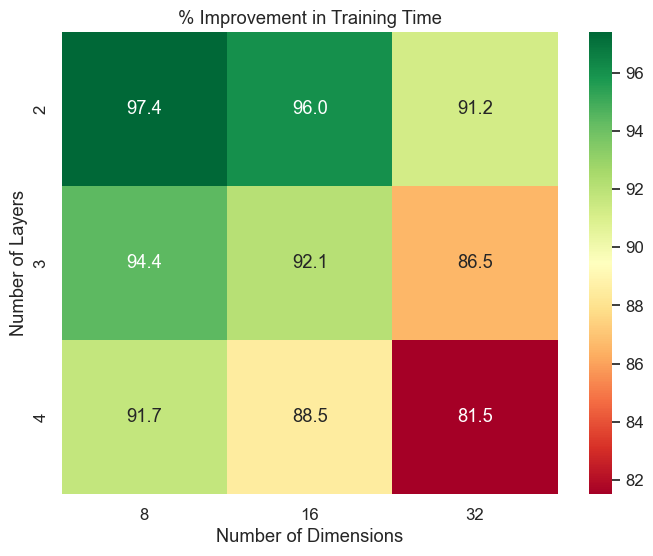

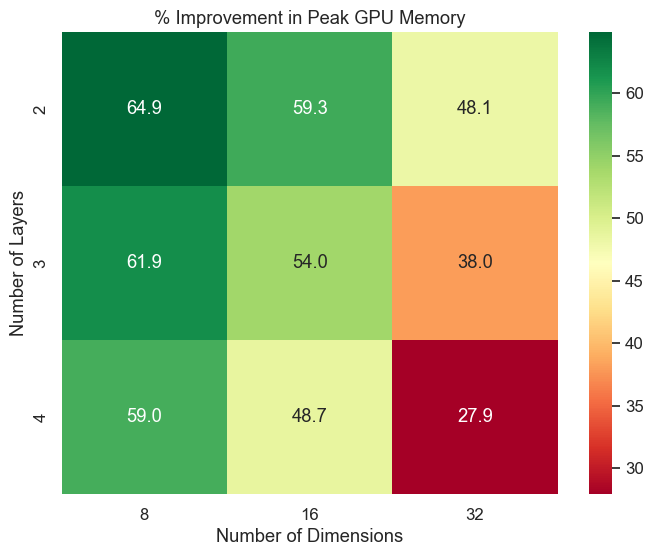

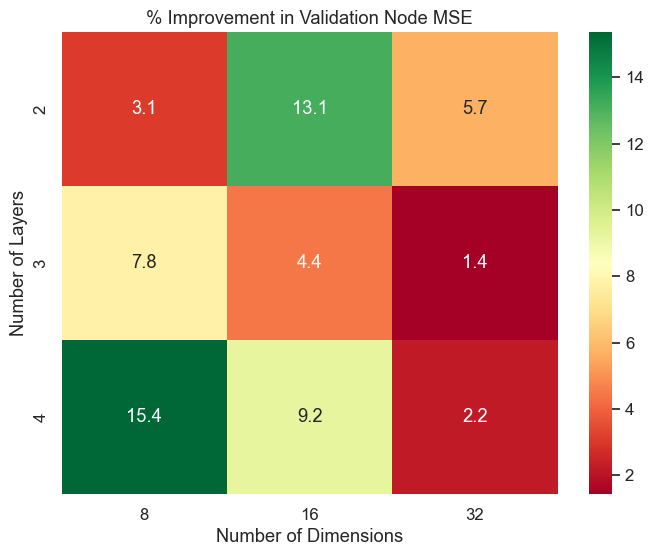

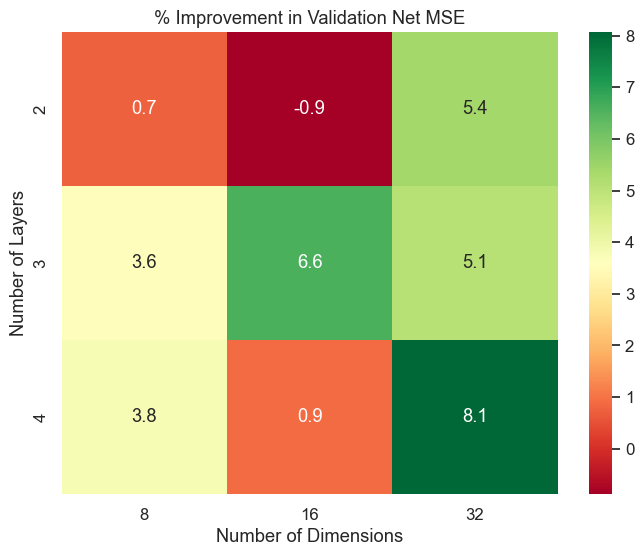

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for nicer plots
sns.set(style="whitegrid", font_scale=1.1)

# Path to grid search CSV (adjust if needed)
grid_search_csv = "../profiling_results/grid-search/grid_search_results.csv"

# Read grid search results CSV
grid_df = pd.read_csv(grid_search_csv)
grid_df["num_layer"] = grid_df["num_layer"].astype(int)
grid_df["num_dim"] = grid_df["num_dim"].astype(int)

# Convert train_time_sec to minutes
grid_df["train_time_min"] = grid_df["train_time_sec"] / 60

# Get baseline values for configuration: 3 layers, 32 dimensions
baseline_val_node = 126.90597534179688
baseline_val_net = 70.34571838378906
baseline_train_time = 39.1834912220637
baseline_gpu_peak = 22133

# Compute percentage values relative to the baseline
grid_df["train_time_pct"] = (baseline_train_time - grid_df["train_time_min"]) / baseline_train_time * 100
grid_df["gpu_peak_pct"]   = (baseline_gpu_peak - grid_df["gpu_peak_mb"]) / baseline_gpu_peak * 100
grid_df["val_node_pct"]   = (baseline_val_node - grid_df["val_node_mse"]) / baseline_val_node * 100
grid_df["val_net_pct"]    = (baseline_val_net - grid_df["val_net_mse"]) / baseline_val_net * 100

# Create pivot tables for heatmaps (percentage values)
pivot_train_time_pct = grid_df.pivot(index="num_layer", columns="num_dim", values="train_time_pct")
pivot_gpu_peak_pct   = grid_df.pivot(index="num_layer", columns="num_dim", values="gpu_peak_pct")
pivot_val_node_pct   = grid_df.pivot(index="num_layer", columns="num_dim", values="val_node_pct")
pivot_val_net_pct    = grid_df.pivot(index="num_layer", columns="num_dim", values="val_net_pct")

# Use a reversed RdYlGn colormap (green is good, red is bad)
cmap = "RdYlGn"

# Plot heatmap for Training Time Percentage
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_train_time_pct, annot=True, fmt=".1f", cmap=cmap)
plt.title("% Improvement in Training Time")
plt.ylabel("Number of Layers")
plt.xlabel("Number of Dimensions")
plt.savefig("../profiling_results/grid-search/heatmap_train_time.png")
plt.show()

# Plot heatmap for GPU Peak Percentage
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_gpu_peak_pct, annot=True, fmt=".1f", cmap=cmap)
plt.title("% Improvement in Peak GPU Memory")
plt.ylabel("Number of Layers")
plt.xlabel("Number of Dimensions")
plt.savefig("../profiling_results/grid-search/heatmap_peak_memory.png")
plt.show()

# Plot heatmap for Validation Node MSE Percentage
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_val_node_pct, annot=True, fmt=".1f", cmap=cmap)
plt.title("% Improvement in Validation Node MSE")
plt.ylabel("Number of Layers")
plt.xlabel("Number of Dimensions")
plt.savefig("../profiling_results/grid-search/heatmap_val_node.png")
plt.show()

# Plot heatmap for Validation Net MSE Percentage
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_val_net_pct, annot=True, fmt=".1f", cmap=cmap)
plt.title("% Improvement in Validation Net MSE")
plt.ylabel("Number of Layers")
plt.xlabel("Number of Dimensions")
plt.savefig("../profiling_results/grid-search/heatmap_val_net.png")
plt.show()


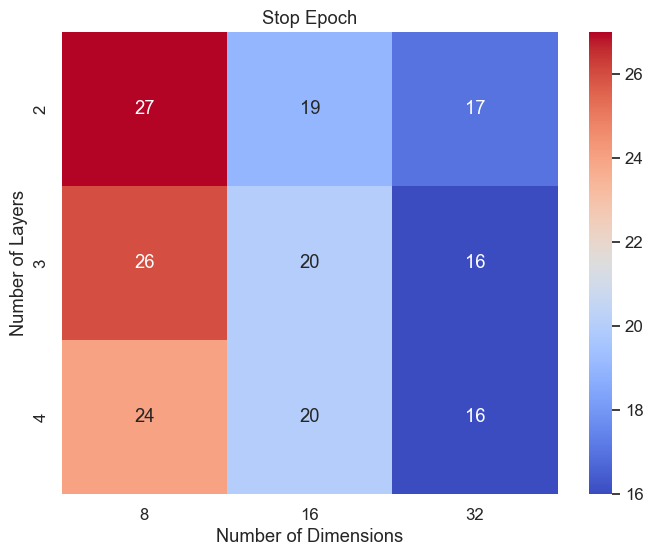

In [9]:
# get the stop epoch for each configuration
stop_epoch_df = train_loss_df.groupby(["num_layer", "num_dim"]).agg({"epoch": "max"}).reset_index()
stop_epoch_df.rename(columns={"epoch": "stop_epoch"}, inplace=True)

# plot the stop epoch heatmap
pivot_stop_epoch = stop_epoch_df.pivot(index="num_layer", columns="num_dim", values="stop_epoch")
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_stop_epoch, annot=True, fmt=".0f", cmap="coolwarm")
plt.title("Stop Epoch")
plt.ylabel("Number of Layers")
plt.xlabel("Number of Dimensions")
plt.savefig("../profiling_results/grid-search/heatmap_stop_epoch.png")
plt.show()